In [1]:
using ReinforcementLearningAnIntroduction

┌ Info: Precompiling ReinforcementLearningAnIntroduction [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1260
┌ Info: Skipping precompilation since __precompile__(false). Importing ReinforcementLearningAnIntroduction [02c1da58-b9a1-11e8-0212-f9611b8fe936].
└ @ Base loading.jl:1033
┌ Warning: Incompatibility detected between CUDA and LLVM 8.0+; disabling debug info emission for CUDA kernels
└ @ CUDAnative /home/tj/.julia/packages/CUDAnative/hfulr/src/CUDAnative.jl:114


In [2]:
env = WindyGridWorldEnv()
ns = length(get_observation_space(env))
na = length(get_action_space(env))

agent = Agent(
    policy=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularApproximator(;n_state=ns, n_action=na),
            optimizer=Descent(0.5)
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
);

hook = StepsPerEpisode()
run(agent, env, StopAfterStep(8000),hook)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


StepsPerEpisode([618, 455, 66, 255, 47, 155, 96, 40, 34, 127  …  17, 15, 15, 23, 17, 17, 23, 22, 16, 19], 8, "TRAINING")

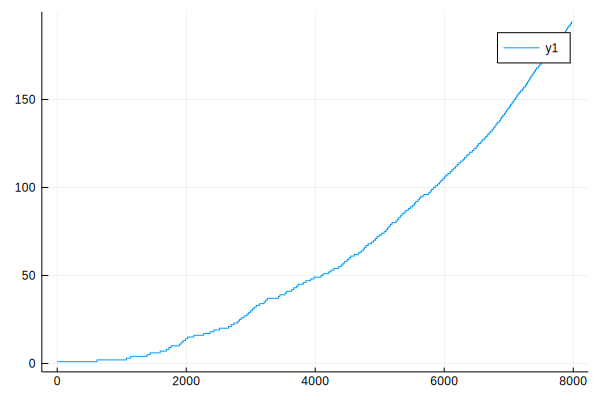

In [3]:
using Plots
plot([i for (i, x) in enumerate(hook.steps) for _ in 1:x])